In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import KFold
np.random.seed(1)
tf.random.set_seed(1)

In [2]:
weather_data = pd.read_csv(r"C:\Users\bharg\OneDrive\Desktop\PS - 1\imd_bharati_hourly1.csv")
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%Y-%m-%d %H:%M:%S')
weather_data['month'] = weather_data['date'].dt.month
weather_data['hour'] = weather_data['date'].dt.hour
weather_data['year'] = weather_data['date'].dt.year
weather_data.loc[weather_data['temp']<-70, 'temp'] = -70
weather_data = weather_data.fillna(0)
weather_data

,date,temp,ap,ws,wd,month,hour,year
0,2015-02-06 00:00:00,-1.59,962.75,9.20,119.28,2,0,2015
1,2015-02-06 01:00:00,-1.26,962.64,8.85,123.86,2,1,2015
2,2015-02-06 02:00:00,-0.57,962.71,7.19,122.56,2,2,2015
3,2015-02-06 03:00:00,0.00,962.94,6.91,122.74,2,3,2015
4,2015-02-06 04:00:00,0.56,963.31,7.48,110.36,2,4,2015
...,...,...,...,...,...,...,...,...
63643,2022-05-11 19:00:00,-15.27,985.70,7.28,80.32,5,19,2022
63644,2022-05-11 20:00:00,-14.62,985.81,11.81,78.17,5,20,2022
63645,2022-05-11 21:00:00,-14.40,985.93,12.17,77.43,5,21,2022
63646,2022-05-11 22:00:00,-14.17,986.10,10.96,77.03,5,22,2022


In [3]:
window_size = (7*24*2)
X, y = [], []
for i in range(len(weather_data) - window_size - (3*24)):
    X.append(weather_data['temp'][i:i+window_size])
    y.append(weather_data['temp'][i+window_size])
X = np.array(X)
y = np.array(y)

In [4]:
k = 5
kf = KFold(n_splits=k)
train_i = []
test_i = []
for train_index, test_index in kf.split(X):
  train_i.append(train_index)
  test_i.append(test_index)

loss = []



In [6]:
##using a for loop to iterate over all the permutations of train and test data, store the individual losses in a list
for i in range(k):
    X_train = X[train_i[i]]
    y_train = y[train_i[i]]
    X_test = X[test_i[i]]
    y_test = y[test_i[i]]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='sigmoid', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='sigmoid'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
    loss.append(model.evaluate(X_test, y_test))
    print('Mean Squared:', loss)

Epoch 1/20
1581/1581 [==============================] - 23s 14ms/step - loss: 10.8921
Epoch 2/20
1581/1581 [==============================] - 22s 14ms/step - loss: 3.4089
Epoch 3/20
1581/1581 [==============================] - 22s 14ms/step - loss: 2.4880
Epoch 4/20
1581/1581 [==============================] - 22s 14ms/step - loss: 2.2383
Epoch 5/20
1581/1581 [==============================] - 22s 14ms/step - loss: 2.1540
Epoch 6/20
1581/1581 [==============================] - 23s 14ms/step - loss: 2.0898
Epoch 7/20
1581/1581 [==============================] - 23s 15ms/step - loss: 2.0178
Epoch 8/20
1581/1581 [==============================] - 23s 15ms/step - loss: 2.0108
Epoch 9/20
1581/1581 [==============================] - 24s 15ms/step - loss: 1.9282
Epoch 10/20
1581/1581 [==============================] - 26s 16ms/step - loss: 1.8960
Epoch 11/20
1581/1581 [==============================] - 27s 17ms/step - loss: 1.8914
Epoch 12/20
1581/1581 [==============================] - 28s 1

In [7]:

loss

[2.549574851989746,
 1.5677179098129272,
 3.340806722640991,
 1.8160009384155273,
 1.1446937322616577]

In [15]:
X_train = X[train_i[4]]
y_train = y[train_i[4]]
X_test = X[test_i[4]]
y_test = y[test_i[4]]
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='sigmoid', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='sigmoid'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=100, verbose=1)
loss_final = model.evaluate(X_test, y_test)
print('loss_final :', loss_final)

Epoch 1/20
506/506 [==============================] - 20s 38ms/step - loss: 20.6898
Epoch 2/20
506/506 [==============================] - 20s 40ms/step - loss: 7.7152
Epoch 3/20
506/506 [==============================] - 19s 37ms/step - loss: 4.5665
Epoch 4/20
506/506 [==============================] - 20s 39ms/step - loss: 3.3634
Epoch 5/20
506/506 [==============================] - 21s 42ms/step - loss: 2.9489
Epoch 6/20
506/506 [==============================] - 23s 45ms/step - loss: 2.7341
Epoch 7/20
506/506 [==============================] - 23s 45ms/step - loss: 2.6203
Epoch 8/20
506/506 [==============================] - 23s 45ms/step - loss: 2.6151
Epoch 9/20
506/506 [==============================] - 24s 47ms/step - loss: 2.5302
Epoch 10/20
506/506 [==============================] - 23s 46ms/step - loss: 2.4592
Epoch 11/20
506/506 [==============================] - 24s 46ms/step - loss: 2.3753
Epoch 12/20
506/506 [==============================] - 21s 41ms/step - loss: 2.3623


In [16]:
future = []
asdf = weather_data['temp'][-(window_size): ]
for i in range(3*24):
    asdf = np.array([asdf])
    aaa = model.predict(asdf)
    pre_temp = aaa[0][0]
    future.append(pre_temp)
    asdf = np.append(asdf[0],pre_temp)[-(window_size): ]

1/1 [==============================] - 0s 29ms/step


In [17]:
date_index = pd.date_range(start='2015-02-06 00:00:00', end='2022-05-14 23:00:00', freq='1H')
date_list = date_index.to_list()
temperatures =  weather_data['temp'].to_list()
temperatures = temperatures + future
df = pd.DataFrame(date_list)
df['date'] = date_list
df['temperatures'] = temperatures
df['future'] = temperatures
df['temperatures'][ 63647: ] = 0
df['future'][ :63647] = 0
df

C:\Users\bharg\AppData\Local\Temp\ipykernel_15356\3144152305.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temperatures'][ 63647: ] = 0
C:\Users\bharg\AppData\Local\Temp\ipykernel_15356\3144152305.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['future'][ :63647] = 0


,0,date,temperatures,future
0,2015-02-06 00:00:00,2015-02-06 00:00:00,-1.59,0.000000
1,2015-02-06 01:00:00,2015-02-06 01:00:00,-1.26,0.000000
2,2015-02-06 02:00:00,2015-02-06 02:00:00,-0.57,0.000000
3,2015-02-06 03:00:00,2015-02-06 03:00:00,0.00,0.000000
4,2015-02-06 04:00:00,2015-02-06 04:00:00,0.56,0.000000
...,...,...,...,...
63715,2022-05-14 19:00:00,2022-05-14 19:00:00,0.00,-10.128952
63716,2022-05-14 20:00:00,2022-05-14 20:00:00,0.00,-10.336106
63717,2022-05-14 21:00:00,2022-05-14 21:00:00,0.00,-10.208002
63718,2022-05-14 22:00:00,2022-05-14 22:00:00,0.00,-9.936956


In [18]:
predict = []
for i in range(62500, len(weather_data) - window_size):
    asdf = weather_data['temp'][i: i + window_size]
    asdf = np.array([asdf])
    aaa = model.predict(asdf)
    pre_temp = aaa[0][0]
    predict.append(pre_temp)
x = 0
weather_data['predict'] = 0
for i in range(62500+window_size,63648):
    weather_data['predict'][i] = predict[x]
    x = x+1
weather_data

1/1 [==============================] - 0s 25ms/step


C:\Users\bharg\AppData\Local\Temp\ipykernel_15356\322255350.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['predict'][i] = predict[x]


,date,temp,ap,ws,wd,month,hour,year,predict
0,2015-02-06 00:00:00,-1.59,962.75,9.20,119.28,2,0,2015,0.000000
1,2015-02-06 01:00:00,-1.26,962.64,8.85,123.86,2,1,2015,0.000000
2,2015-02-06 02:00:00,-0.57,962.71,7.19,122.56,2,2,2015,0.000000
3,2015-02-06 03:00:00,0.00,962.94,6.91,122.74,2,3,2015,0.000000
4,2015-02-06 04:00:00,0.56,963.31,7.48,110.36,2,4,2015,0.000000
...,...,...,...,...,...,...,...,...,...
63643,2022-05-11 19:00:00,-15.27,985.70,7.28,80.32,5,19,2022,-16.329611
63644,2022-05-11 20:00:00,-14.62,985.81,11.81,78.17,5,20,2022,-16.590733
63645,2022-05-11 21:00:00,-14.40,985.93,12.17,77.43,5,21,2022,-15.917387
63646,2022-05-11 22:00:00,-14.17,986.10,10.96,77.03,5,22,2022,-14.852256


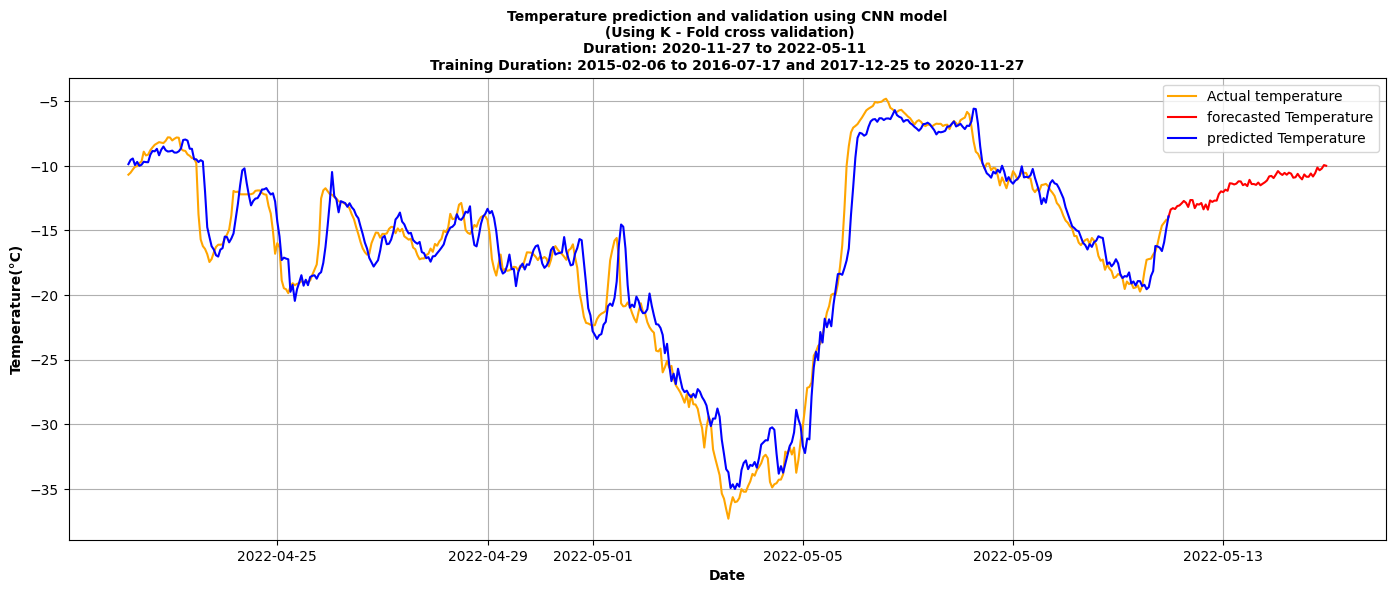

In [24]:
plt.figure(figsize=(17, 6))
plt.plot(df['date'][63172:63647],df['temperatures'][63172:63647],label = 'Actual temperature',color = 'orange')
plt.plot(df['date'][63647: ],df['future'][63647:], label = 'forecasted Temperature', color = 'red')
plt.plot(weather_data['date'][63172: ],weather_data['predict'][63172: ], label = 'predicted Temperature', color = 'blue')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Temperature(°C)',fontweight='bold')
plt.legend()
plt.title('Temperature prediction and validation using CNN model\n (Using K - Fold cross validation)\nDuration: 2020-11-27 to 2022-05-11 \nTraining Duration: 2015-02-06 to 2016-07-17 and 2017-12-25 to 2020-11-27', fontsize=10, fontweight='bold')
plt.grid(True)
plt.savefig("CNN_kfold", dpi=800)

In [20]:
test_i[1]

array([12648, 12649, 12650, ..., 25293, 25294, 25295])

In [21]:
print(weather_data['date'][12648])
print(weather_data['date'][25295])


2016-07-17 00:00:00
2017-12-25 23:00:00
